In [5]:
pip install numpy pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('Water Quality Prediction.csv')

# Specify categorical columns
categorical_columns = ['Color', 'Source', 'Month']

# Apply One-Hot Encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop the 'Index' column as it's not needed for the analysis
df = df.drop(columns=['Index'])


In [7]:
import numpy as np

# Separate features and target
features = df.drop(columns=['Target'])
target = df['Target']

# Separate data based on classes
class_0 = features[target == 0]
class_1 = features[target == 1]

# Calculate the mean (centroid) for each class
centroid_0 = class_0.mean(axis=0)
centroid_1 = class_1.mean(axis=0)

# Calculate spread (standard deviation) for each class
spread_0 = class_0.std(axis=0)
spread_1 = class_1.std(axis=0)

# Calculate the distance between mean vectors (Euclidean distance)
distance_between_centroids = np.linalg.norm(centroid_0 - centroid_1)

print("Centroid for class 0:\n", centroid_0)
print("Centroid for class 1:\n", centroid_1)
print("Spread for class 0:\n", spread_0)
print("Spread for class 1:\n", spread_1)
print("Distance between class centroids:", distance_between_centroids)


Centroid for class 0:
 pH                          7.465185
Iron                        0.070698
Nitrate                     5.782838
Chloride                  174.293907
Lead                        0.000586
Zinc                        1.460667
Turbidity                   0.371551
Fluoride                    0.865034
Copper                      0.424425
Odor                        1.679067
Sulfate                   139.806499
Conductivity              424.886924
Chlorine                    3.178594
Manganese                   0.045692
Total Dissolved Solids    257.020851
Water Temperature          19.161493
Air Temperature            60.007485
Day                        15.733329
Time of Day                11.495902
Color_Faint Yellow          0.172877
Color_Light Yellow          0.094348
Color_Near Colorless        0.345374
Color_Yellow                0.041315
Source_Ground               0.123174
Source_Lake                 0.122317
Source_Reservoir            0.122457
Source_River   

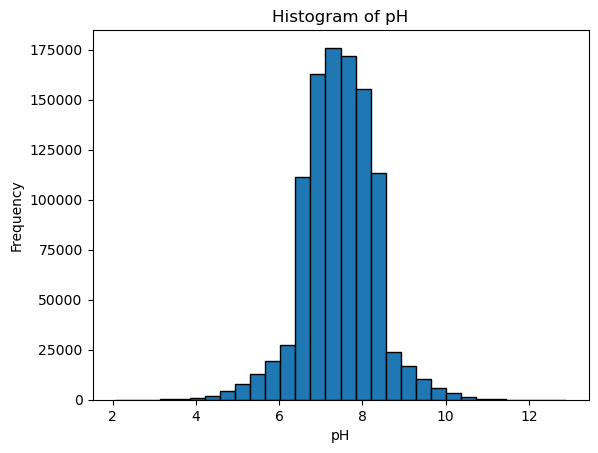

Mean of pH: 7.449869487765476
Variance of pH: 0.7188420376271661


In [8]:
import matplotlib.pyplot as plt

# Choose a feature, for example, 'pH'
feature_name = 'pH'
feature_data = df[feature_name]

# Plot histogram
plt.hist(feature_data, bins=30, edgecolor='k')
plt.title(f'Histogram of {feature_name}')
plt.xlabel(f'{feature_name}')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean_value = feature_data.mean()
variance_value = feature_data.var()

print(f'Mean of {feature_name}: {mean_value}')
print(f'Variance of {feature_name}: {variance_value}')


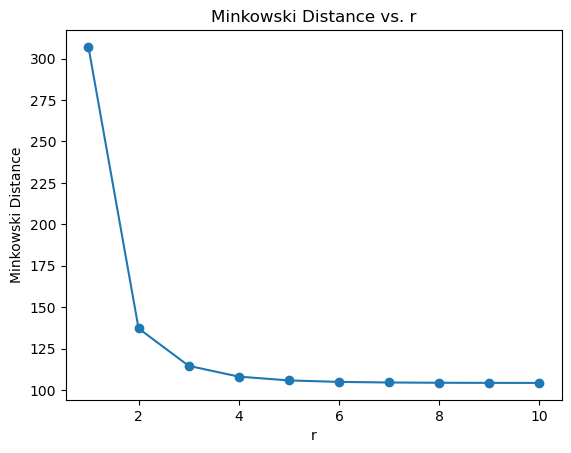

In [9]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt

# Fill NaNs with the mean of each feature
features_clean = features.fillna(features.mean())

# Choose two feature vectors, for example, the first and second row
vector1 = features_clean.iloc[0].astype(float).values
vector2 = features_clean.iloc[1].astype(float).values

minkowski_distances = []

# Calculate Minkowski distance for r from 1 to 10
for r in range(1, 11):
    dist = distance.minkowski(vector1, vector2, r)
    minkowski_distances.append(dist)

# Plot the distances
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Features and target
X = features
y = target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')


Training set size: 734002
Test set size: 314573


In [11]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [12]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Keep the corresponding y values
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # Keep the corresponding y values


In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [14]:
# Test accuracy
accuracy = knn.score(X_test, y_test)
print(f'Accuracy of kNN classifier (k=3): {accuracy}')


Accuracy of kNN classifier (k=3): 0.7676210997389467


In [15]:
# Predict the class for the test set
predictions = knn.predict(X_test)

# Print first few predictions
print(f'Predictions for the test set:\n {predictions[:10]}')


Predictions for the test set:
 [0 0 1 0 0 1 1 0 0 1]


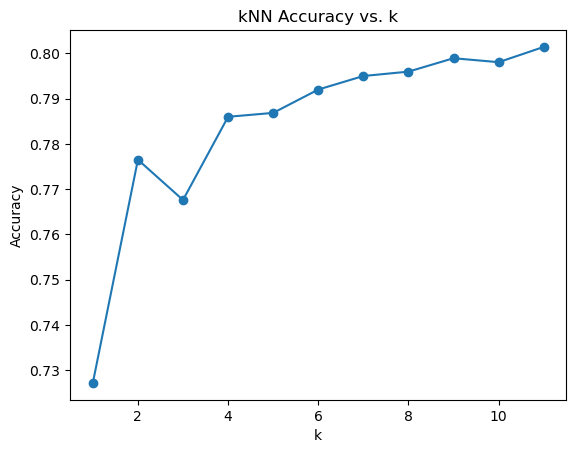

In [16]:
accuracies = []

# Vary k from 1 to 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot accuracy vs. k
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('kNN Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


In [17]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# Performance metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Analyzing the model's performance
if precision > 0.8 and recall > 0.8:
    print("The model seems to have a good fit (regularfit).")
elif precision > recall:
    print("The model might be underfitting.")
else:
    print("The model might be overfitting.")


Confusion Matrix:
 [[150422  16854]
 [ 33618  16303]]
Precision: 0.49169104563139004
Recall: 0.3265759900643016
F1-Score: 0.3924745419966778
The model might be underfitting.


Confusion Matrix:
 [[150422  16854]
 [ 33618  16303]]
Precision: 0.49169104563139004
Recall: 0.3265759900643016
F1-Score: 0.3924745419966778
The model might be underfitting.


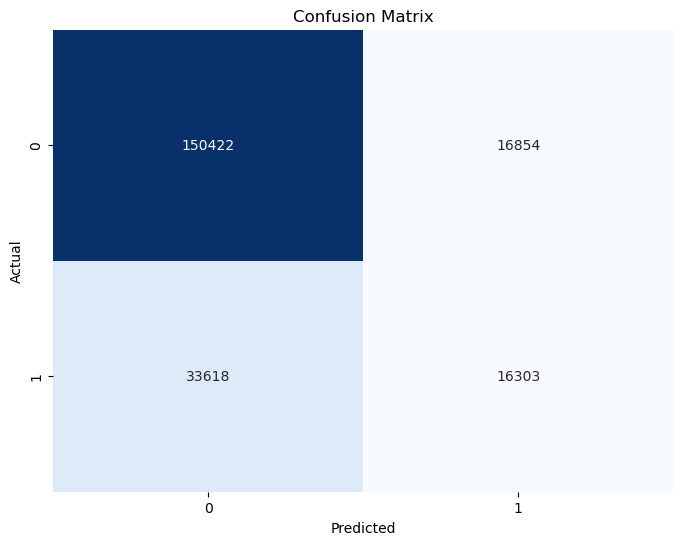

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", cm)

# Performance metrics
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

# Analyzing the model's performance
if precision > 0.8 and recall > 0.8:
    print("The model seems to have a good fit (regular fit).")
elif precision > recall:
    print("The model might be underfitting.")
else:
    print("The model might be overfitting.")

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion Matrix for Test Data
test_predictions = knn.predict(X_test)
cm_test = confusion_matrix(y_test, test_predictions)

# Confusion Matrix for Training Data
train_predictions = knn.predict(X_train)
cm_train = confusion_matrix(y_train, train_predictions)

# Precision, Recall, F1-Score for Test Data
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)

# Precision, Recall, F1-Score for Training Data
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)

print("Confusion Matrix for Test Data:\n", cm_test)
print("Confusion Matrix for Training Data:\n", cm_train)
print(f'Precision for Test Data: {precision_test}')
print(f'Recall for Test Data: {recall_test}')
print(f'F1-Score for Test Data: {f1_test}')
print(f'Precision for Training Data: {precision_train}')
print(f'Recall for Training Data: {recall_train}')
print(f'F1-Score for Training Data: {f1_train}')

# Analyzing the model's performance
if precision_test > 0.8 and recall_test > 0.8:
    print("The model seems to have a good fit (regularfit).")
elif precision_test > recall_test:
    print("The model might be underfitting.")
else:
    print("The model might be overfitting.")


Confusion Matrix for Test Data:
 [[158314   8962]
 [ 34169  15752]]
Confusion Matrix for Training Data:
 [[372629  17611]
 [ 76059  40474]]
Precision for Test Data: 0.6373715303067088
Recall for Test Data: 0.3155385509104385
F1-Score for Test Data: 0.42210759027266026
Precision for Training Data: 0.6968064044073341
Recall for Training Data: 0.34731792711077547
F1-Score for Training Data: 0.46357191125771685
The model might be underfitting.


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Example: Generating a simple regression dataset
# Assuming the data has two features ('X1', 'X2') and a target ('Target')
np.random.seed(42)

# Generate some synthetic data
X = np.random.rand(100, 2) * 10  # 100 data points, 2 features
y_true = 3 * X[:, 0] + 5 * X[:, 1] + np.random.randn(100) * 2  # Linear relation with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = model.predict(X_test)

# Now calculate the regression metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# R2 Score
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'R2 Score: {r2}')



MSE: 3.990012373662316
RMSE: 1.9975015328310304
MAPE: 5.09573836156914
R2 Score: 0.9844439173888949


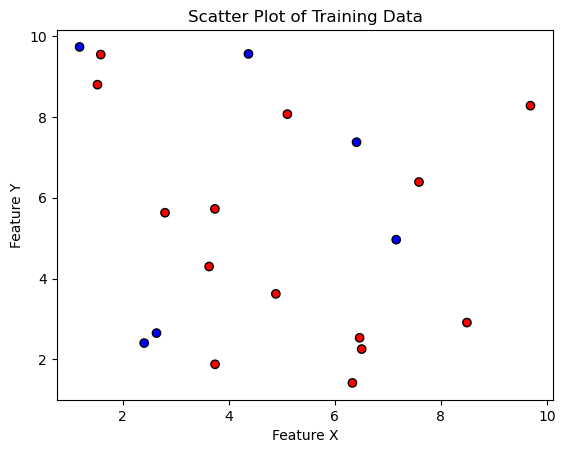

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 20 random data points
np.random.seed(42)
X_train = np.random.uniform(1, 10, (20, 2))
y_train = np.random.randint(0, 2, 20)

# Assign class colors
colors = ['blue' if label == 0 else 'red' for label in y_train]

# Scatter plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='k')
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()


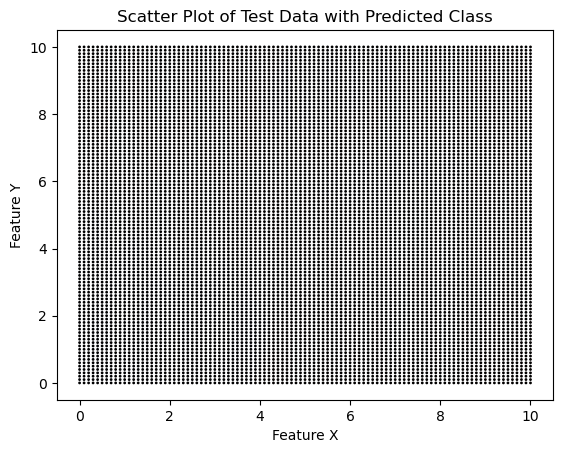

In [22]:
# Generate test set data
X_test = np.array([[x, y] for x in np.arange(0, 10.1, 0.1) for y in np.arange(0, 10.1, 0.1)])

# kNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Classify test data
test_predictions = knn.predict(X_test)

# Scatter plot for test data
test_colors = ['blue' if label == 0 else 'red' for label in test_predictions]
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_colors, s=1, edgecolor='k')
plt.title('Scatter Plot of Test Data with Predicted Class')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()


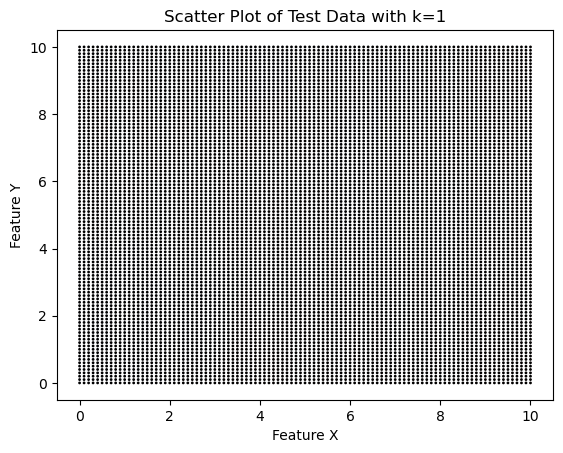

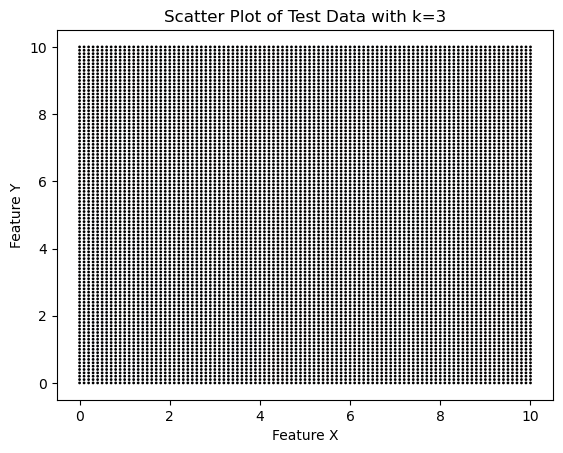

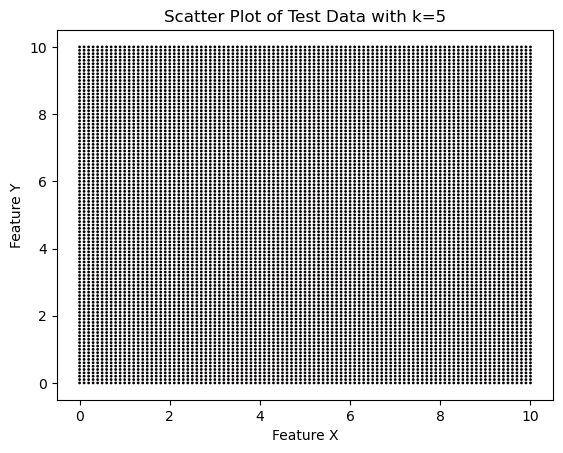

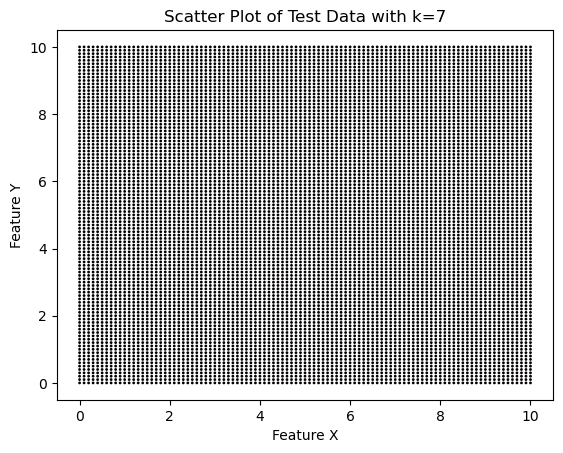

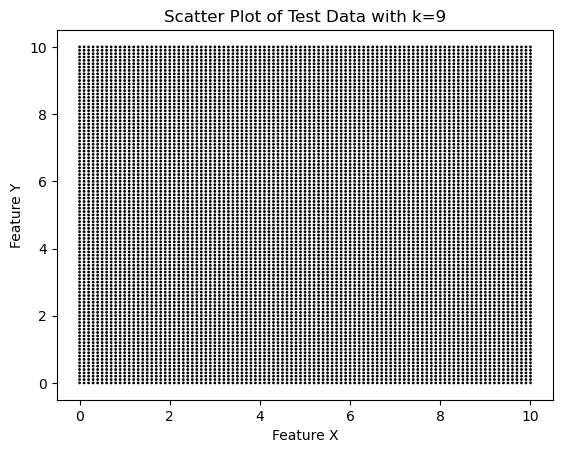

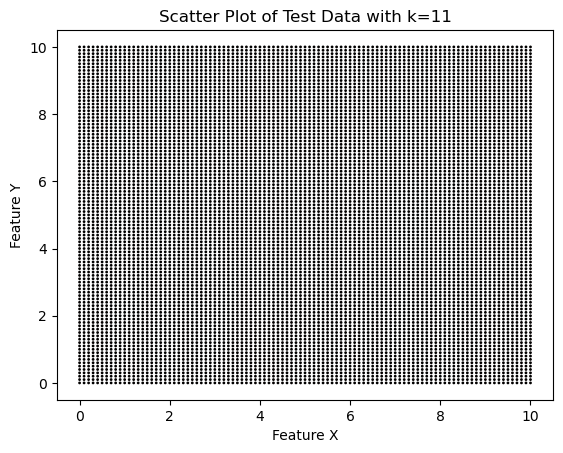

In [23]:
for k in [1, 3, 5, 7, 9, 11]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    test_predictions = knn.predict(X_test)

    test_colors = ['blue' if label == 0 else 'red' for label in test_predictions]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=test_colors, s=1, edgecolor='k')
    plt.title(f'Scatter Plot of Test Data with k={k}')
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.show()


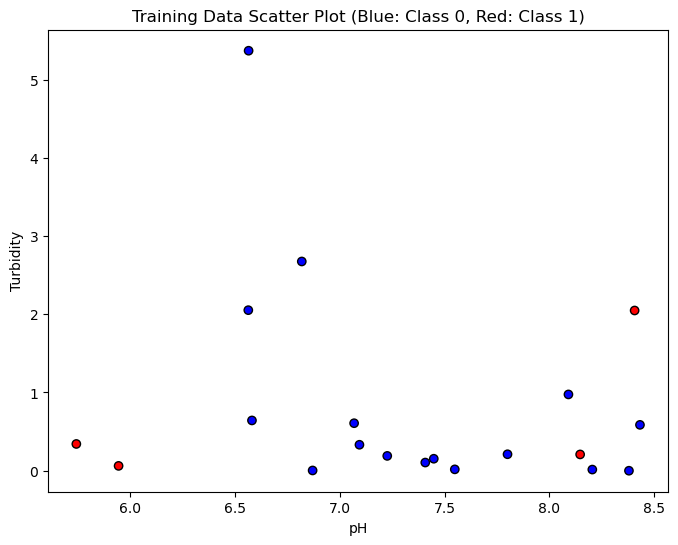

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Use the project data (df) with 'pH', 'Turbidity', and 'Target'
X_project = df[['pH', 'Turbidity']].values  # Select two features
y_project = df['Target'].values  # Target variable

# Split the data (20 points as requested, 70% for training)
X_train, X_test, y_train, y_test = train_test_split(X_project, y_project, train_size=20, random_state=42)

# A3: Scatter plot of training data
plt.figure(figsize=(8, 6))
train_colors = ['blue' if label == 0 else 'red' for label in y_train]  # Color points by class (blue for 0, red for 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_colors, edgecolor='k')
plt.title('Training Data Scatter Plot (Blue: Class 0, Red: Class 1)')
plt.xlabel('pH')
plt.ylabel('Turbidity')
plt.show()


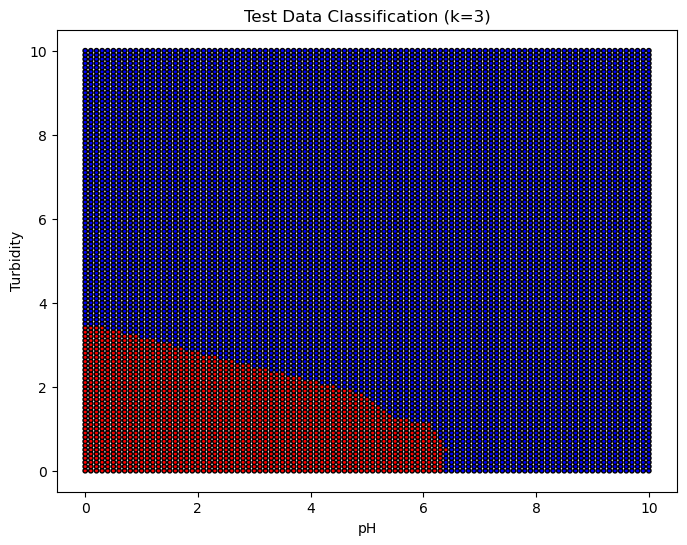

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Generate test set data with values of pH and Turbidity between 0 and 10 (increments of 0.1)
x_test_values = np.arange(0, 10.1, 0.1)
y_test_values = np.arange(0, 10.1, 0.1)
X_test_grid = np.array([[x, y] for x in x_test_values for y in y_test_values])

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the class for test set
test_predictions = knn.predict(X_test_grid)

# A4: Plot test data classification results
test_colors = ['blue' if label == 0 else 'red' for label in test_predictions]  # Color points by predicted class
plt.figure(figsize=(8, 6))
plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=test_colors, edgecolor='k', s=10)
plt.title('Test Data Classification (k=3)')
plt.xlabel('pH')
plt.ylabel('Turbidity')
plt.show()


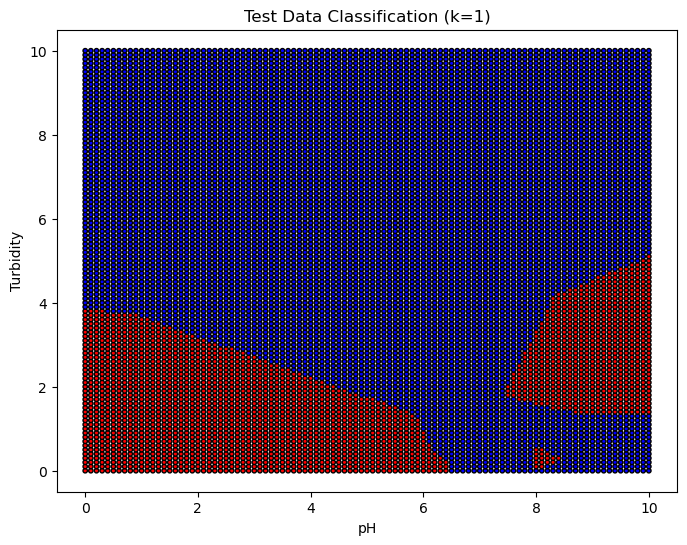

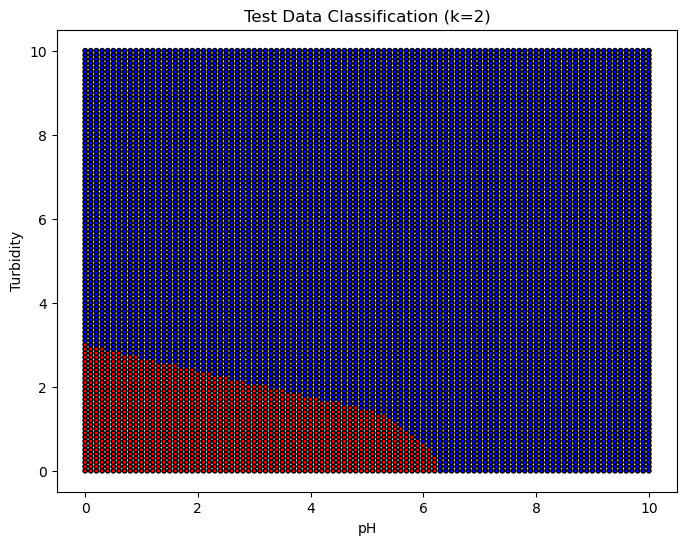

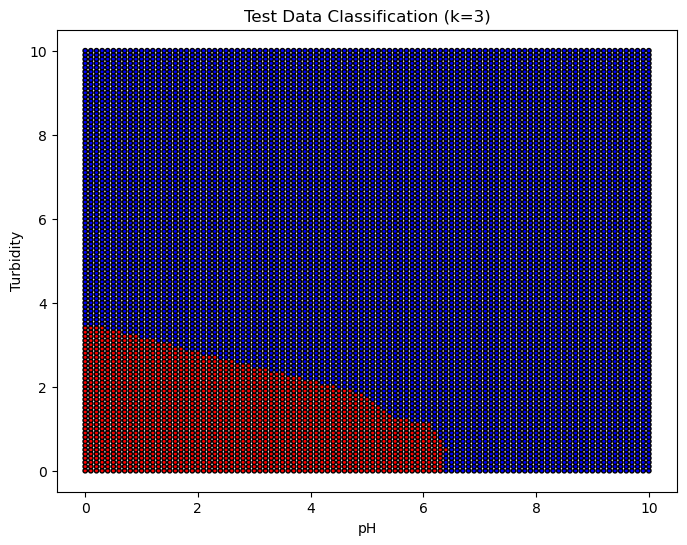

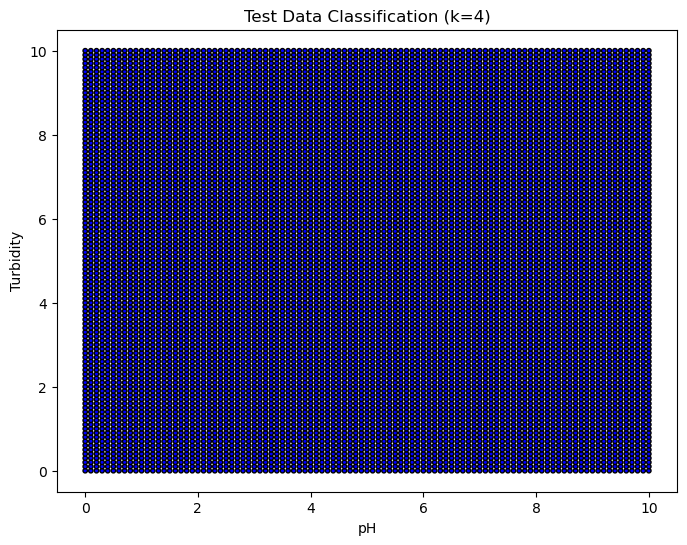

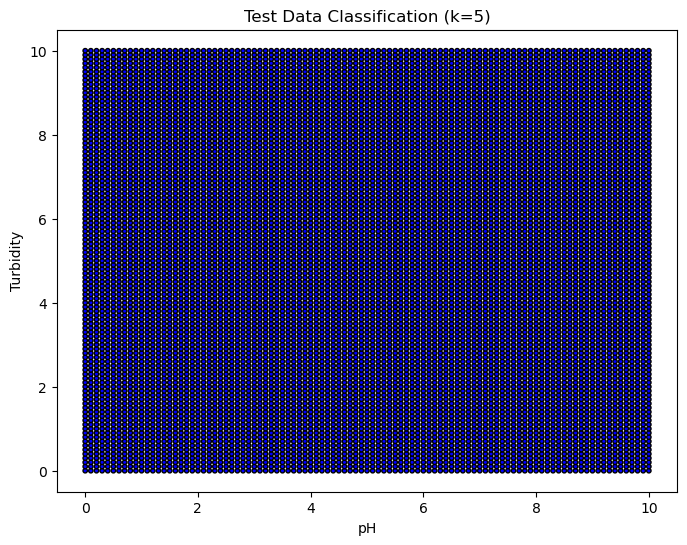

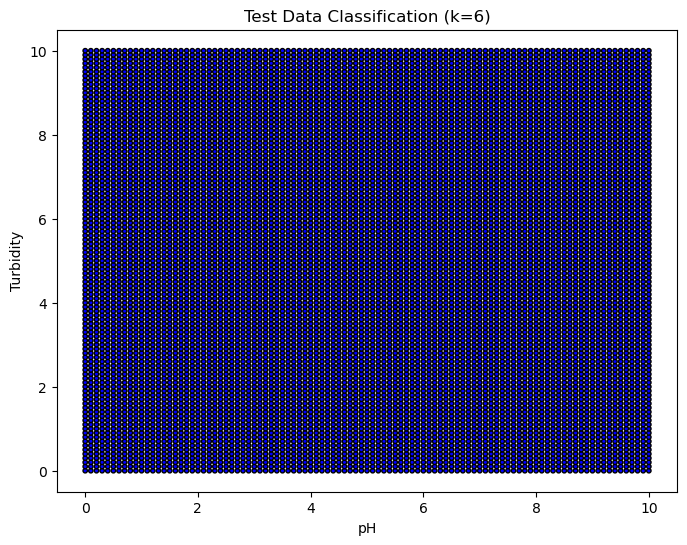

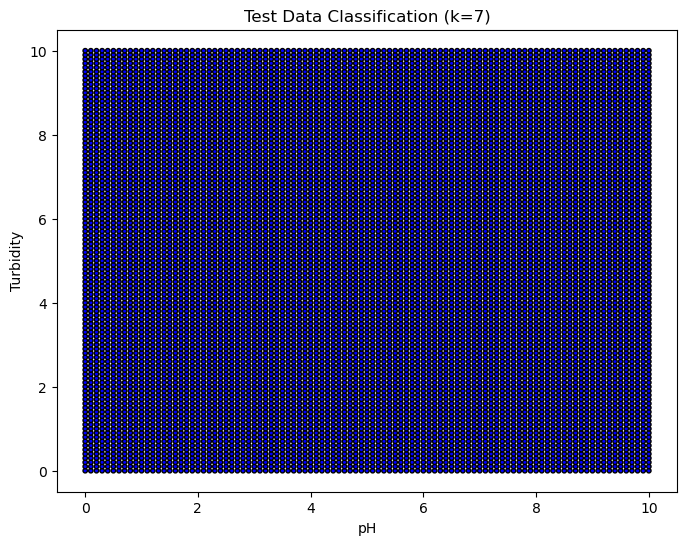

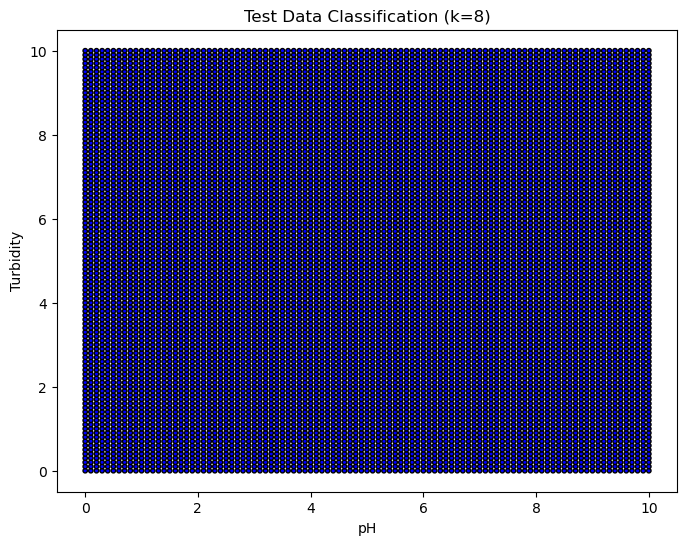

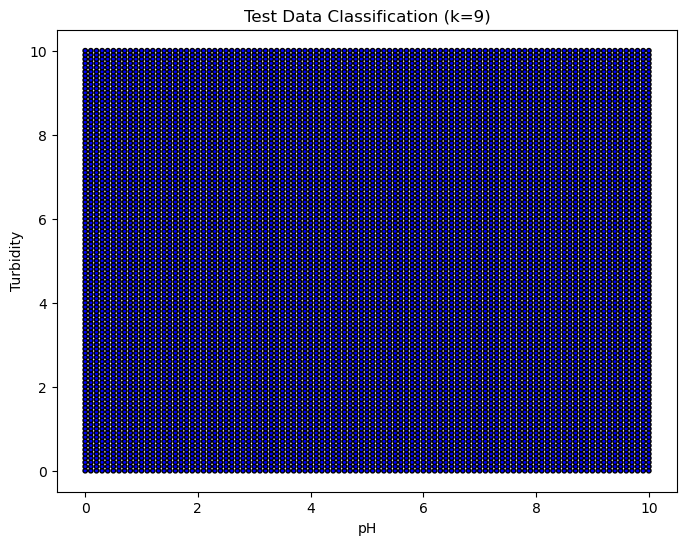

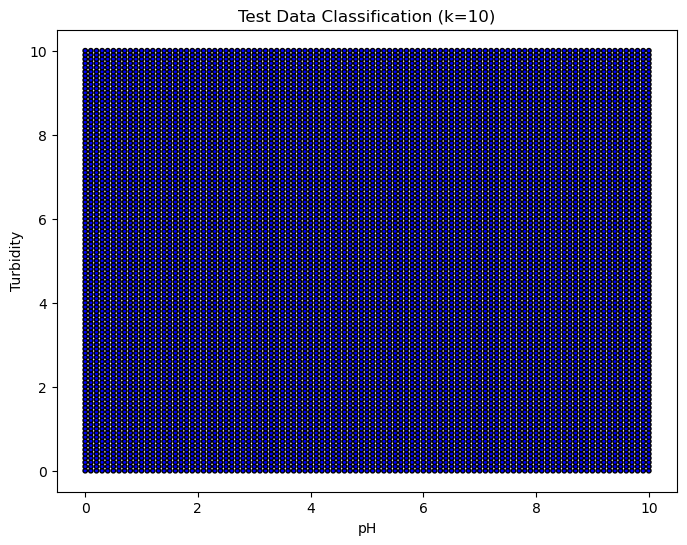

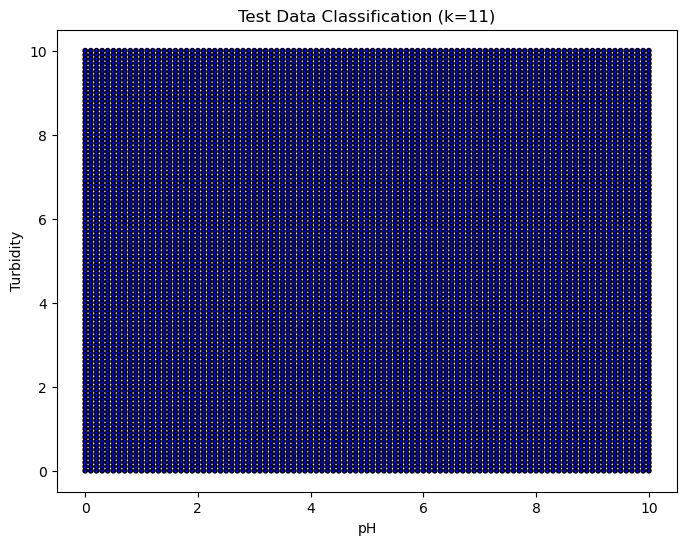

In [26]:
# A5: Repeat classification for various k values and observe the change in the class boundary
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict the class for the grid of test points
    test_predictions = knn.predict(X_test_grid)
    
    # Plot test data classification results for the current k
    test_colors = ['blue' if label == 0 else 'red' for label in test_predictions]  # Color points by predicted class
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_grid[:, 0], X_test_grid[:, 1], c=test_colors, edgecolor='k', s=10)
    plt.title(f'Test Data Classification (k={k})')
    plt.xlabel('pH')
    plt.ylabel('Turbidity')
    plt.show()


In [27]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparameter tuning for k in kNN
param_grid = {'n_neighbors': np.arange(1, 20)}

# Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f'Best k found using GridSearchCV: {grid_search.best_params_}')

# Alternatively, use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print(f'Best k found using RandomizedSearchCV: {random_search.best_params_}')


C:\Users\saini\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\saini\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sam

Best k found using GridSearchCV: {'n_neighbors': 1}


C:\Users\saini\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 415, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\base.py", line 764, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\saini\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 259, in predict
    probabil

Best k found using RandomizedSearchCV: {'n_neighbors': 1}


C:\Users\saini\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [0.8  0.85 0.8  0.8   nan  nan 0.8  0.8  0.8  0.8 ]
  warnings.warn(
